# 人脸关键点识别

分别使用5个特征点和68个特征点进行标定。

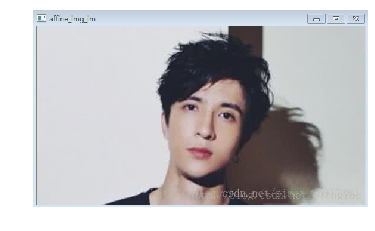

In [19]:
import numpy as np
import dlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw

%matplotlib inline

path = 'Detection/data/Image/xzq.png'
im = Image.open(path)
im = np.array(im)

plt.axis('off')
plt.imshow(im)


class NoFaces(Exception):
    pass

In [20]:
face_detector = dlib.get_frontal_face_detector()
face_locations = face_detector(im, upsample_num_times = 1)

if(len(face_locations) == 0):
    raise NoFaces

# 5点标定

小目标人脸标定

In [21]:
predictor_5_point_model = "/Users/yujun/VirtualEnvs/face_recognition/lib/python3.5/site-packages" \
                            "/face_recognition_models/models/shape_predictor_5_face_landmarks.dat"
pose_predictor_point = dlib.shape_predictor(predictor_5_point_model)


# 68点标定

大目标人脸标定

In [32]:
predictor_68_point_model = "/Users/yujun/VirtualEnvs/face_recognition/lib/python3.5/site-packages" \
                            "/face_recognition_models/models/shape_predictor_68_face_landmarks.dat"
pose_predictor_point = dlib.shape_predictor(predictor_68_point_model)


[[335 182]
 [311 177]
 [254 163]
 [276 168]
 [285 216]]


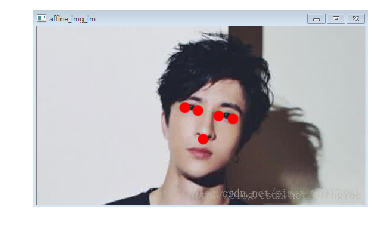

In [22]:
plt.figure()
plt.axis('off')
plt.imshow(im)
currentAxis = plt.gca()

for face_location in face_locations:

    landmarks = np.matrix([[p.x, p.y] for p in pose_predictor_point(im, face_location).parts()])
    
    print(landmarks)
 
    for landmark in landmarks:
        
        pos = landmark[0,0], landmark[0,1]
        
        circ1e = plt.Circle(pos, 8, color = 'r')
        currentAxis.add_artist(circ1e)
 

# 应用---上妆

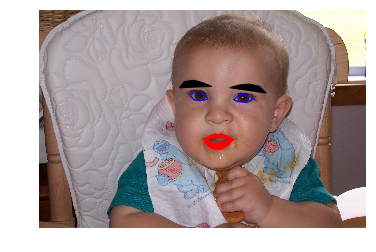

In [112]:
plt.figure()
plt.axis('off')
plt.imshow(im)
currentAxis = plt.gca()

for face_location in face_locations:
    
    landmarks = pose_predictor_point(im, face_location)
    
    points = [[p.x, p.y] for p in landmarks.parts()]
    
    face_landmarks_list = [{
        "chin": points[0:17],
        "left_eyebrow": points[17:22],
        "right_eyebrow": points[22:27],
        "nose_bridge": points[27:31],
        "nose_tip": points[31:36],
        "left_eye": points[36:42],
        "right_eye": points[42:48],
        "top_lip": points[48:55] + [points[64]] + [points[63]] + [points[62]] + [points[61]] + [points[60]],
        "bottom_lip": points[54:60] + [points[48]] + [points[60]] + [points[67]] + [points[66]] + [points[65]] + [points[64]]
    }]
        
for face_landmarks in face_landmarks_list: 
    
    # Makeup the eyebrows
    left_eyebrow = plt.Polygon(face_landmarks['left_eyebrow'], color='black')
    right_eyebrow = plt.Polygon(face_landmarks['right_eyebrow'], color='black')
    currentAxis.add_patch(left_eyebrow)
    currentAxis.add_patch(right_eyebrow)
    
    #Makeup the eyes
    left_eye = plt.Polygon(face_landmarks['left_eye'], color='blue', fill=False)
    right_eye = plt.Polygon(face_landmarks['right_eye'], color='blue', fill=False)
    currentAxis.add_patch(left_eye)
    currentAxis.add_patch(right_eye)
    
    # Makeup the lips
    top_lip = plt.Polygon(face_landmarks['top_lip'], color='red')
    bottom_lip = plt.Polygon(face_landmarks['bottom_lip'], color='red')
    currentAxis.add_patch(top_lip)
    currentAxis.add_patch(bottom_lip)
